# Artificial and Computational Intelligence Assignment 1

## Problem solving by Informed Search and/or Local Search

**Mandatory Detail: The Word  document and IPYNB FILE must include:**

o	BITS IDs of all team members

o	Their individual contribution percentages






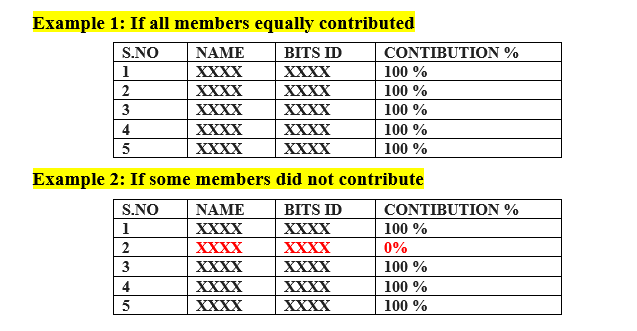

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

##### Performance:

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [114]:
#Code Block : Set Initial State (Must handle dynamic inputs)
import re
import time
import sys
from queue import PriorityQueue

start_time = time.time()

rows=6
columns=7

In [115]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

path_graph={
    'D1':[('D2',8),('E1',3)],
    'E1':[('F1',3)],
    'D2':[('C2',3)],
    'C2':[('B2',3)],
    'B2':[('A2',3)],
    'A2':[('A1',3),('A3',8)],
    'A1':[('B1',3)],
    'B1':[('C1',3)],
    'A3':[('B3',3)],
    'B3':[('C3',3)],
    'C3':[('D3',3)],
    'D3':[('E3',3)],
    'E3':[('E2',3),('E4',8)],
    'E4':[('D4',3)],
    'D4':[('C4',3)],
    'C4':[('B4',3)],
    'B4':[('A4',3)],
    'A4':[('A5',8)],
    'A5':[('B5',3)],
    'B5':[('C5',3)],
    'C5':[('D5',3)],
    'D5':[('E5',3)],
    'E5':[('E6',8)],
    'E6':[('D6',3)],
    'D6':[('C6',3)],
    'C6':[('B6',3)],
    'B6':[('A6',3)],
    'A6':[('A7',8)],
    'A7':[('B7',3)],
    'B7':[('C7',3)],
    'C7':[('D7',3)],
    'F1':[('F2',8)],
    'F2':[('F3',8)],
    'F3':[('F4',8)],
    'F4':[('F5',8)],
    'F5':[('F6',8)],
    'F6':[('F7',8)],
    'F7':[('E7',3)],
    'E7':[('D7',3)],
}
def get_heuristic_paths(goal_node):
    heuristic_map={}
    match = re.match(r"([A-Za-z]+)([0-9]+)", goal_node)
    if match:
        letter_part = match.group(1)
        number_part = int(match.group(2))
        int_alphabet_map={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F'}
        key = next((k for k, v in int_alphabet_map.items() if v == letter_part), None)
        goal_node_position=(key,int(number_part)-1)
        for i in range(0,rows):
            for j in range(0,columns):
                heuristic_map[f'{int_alphabet_map[i]}{j+1}']=abs(goal_node_position[0]-i)+abs(goal_node_position[1]-j)
    return heuristic_map

In [116]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented
def expandChildNodes(new_cost, nodeList,heuristic_map,neighbor, heuristic_weight):
    heuristic = heuristic_map.get(neighbor, 0)
    priority = new_cost + heuristic_weight * heuristic
    return (priority, new_cost, nodeList + [neighbor])

In [117]:
#Code block : Write function to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
def isGoalReached(current_node, goal_node):
    return current_node == goal_node


### 2.	Definition of Algorithm  (Mention the Name of the algorithm )

In [118]:
#Code Block : Function for algorithm 1 implementation

def aStarAlgorithm(start_node, goal_node, heuristic_weight):
    heuristic_map=get_heuristic_paths(goal_node)
    open_queue = PriorityQueue()
    open_queue.put((0,0,[start_node]))
    visited = set()
    while not open_queue.empty() :
        _, cost_so_far, nodeList = open_queue.get()
        current_node = nodeList[-1]
        if current_node in visited:
            continue
        visited.add(current_node)
        if isGoalReached(current_node, goal_node):
            return {
                'goal_path': nodeList,
                'closednode_list': list(visited),
                'closednode_list_len': len(visited)
        }
        for neighbor, edge_cost in path_graph.get(current_node, []):
            if neighbor not in visited:
                new_cost = cost_so_far+edge_cost
                open_queue.put(expandChildNodes(new_cost, nodeList, heuristic_map, neighbor, heuristic_weight))
    return {'goal_path':None, 'closednode_list':list(visited),
                'closednode_list_len': len(visited)}

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [119]:
#Code Block : Function & call to get inputs (start/end state)
start_node= input('Please enter the start/initial node between (A1-F7)')
goal_node= input('Please enter the end/goal node between (A1-F7)')
heuristic_weight= float(input('Please enter heuristic weight in numberic'))

### 4.	Calling the search algorithms

In [120]:
#Invoke algorithm 1 (Should Print the solution, path, cost, Interpretation etc., (As mentioned in the problem))
result=aStarAlgorithm(start_node,goal_node,heuristic_weight)
print(result['goal_path'])
print(result['closednode_list'])

['D1', 'E1', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'E7', 'D7']
['B2', 'E1', 'D3', 'A1', 'F3', 'F7', 'F5', 'D2', 'D1', 'F2', 'A3', 'B1', 'C2', 'C3', 'E2', 'E7', 'F1', 'D4', 'C1', 'F4', 'A2', 'D7', 'B3', 'F6', 'E3', 'E4']


### 5.	Comparitive Analysis

In [121]:
#Code Block : Print the Time & Space complexity of algorithm
end_time = time.time()
print(f"Execution time: {(end_time - start_time):.6f} seconds")
print(f"Visited set memory: {sys.getsizeof(result['closednode_list'])} bytes")

Execution time: 12.625363 seconds
Visited set memory: 264 bytes
